In [0]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [178]:
df = pd.read_csv('/content/cartwheel.csv')
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [179]:
df.shape

(5735, 28)

In [180]:
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

**DIFFERENCE OF PROPORTION  FOR MALE AND FEMALE SMOKER**

In [181]:
df['SMQ020'].unique()

array([1, 2, 7, 9])

In [0]:
df_smoker = df[['SMQ020', 'RIAGENDR']]

In [183]:
df_smoker['SMQ020'].replace(to_replace=7, value=np.nan,inplace=True)

df_smoker['SMQ020'].unique()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


array([ 1.,  2., nan,  9.])

In [184]:
df_smoker['SMQ020'].replace(to_replace=9, value=np.nan,inplace=True)
df_smoker['SMQ020'].unique()


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


array([ 1.,  2., nan])

In [185]:
df_smoker.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [186]:
df_smoker.shape

(5725, 2)

In [187]:
df_smoker['RIAGENDR'].unique()

array([1, 2])

In [188]:
df_smoker['SMQ020'].replace(to_replace=1, value='yes',inplace=True)
df_smoker['SMQ020'].replace(to_replace=2, value='no',inplace=True)
df_smoker['RIAGENDR'].replace(to_replace=1, value='Male',inplace=True)
df_smoker['RIAGENDR'].replace(to_replace=2, value='Female',inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [189]:
df_smoker.head()

,SMQ020,RIAGENDR
0,yes,Male
1,yes,Male
2,yes,Male
3,no,Female
4,no,Female


In [190]:
pd.crosstab(df_smoker['RIAGENDR'],df_smoker['SMQ020'])

SMQ020,no,yes
RIAGENDR,,
Female,2066,906
Male,1340,1413


In [0]:
df_smoker_male = df_smoker.loc[df_smoker['RIAGENDR'] == 'Male']
df_smoker_female = df_smoker.loc[df_smoker['RIAGENDR'] == 'Female']

In [192]:
df_smoker_male.head()

,SMQ020,RIAGENDR
0,yes,Male
1,yes,Male
2,yes,Male
6,yes,Male
8,no,Male


In [193]:
df_smoker_female.head()

,SMQ020,RIAGENDR
3,no,Female
4,no,Female
5,no,Female
7,no,Female
12,yes,Female


In [194]:
df_smoker_male.describe()

,SMQ020,RIAGENDR
count,2753,2753
unique,2,1
top,yes,Male
freq,1413,2753


In [195]:
df_smoker_female.describe()

,SMQ020,RIAGENDR
count,2972,2972
unique,2,1
top,no,Female
freq,2066,2972


In [0]:
p_male = 1413/2753
p_female=906/2972

In [0]:
zstar=1.96
n_male=2753
n_female=2972

In [0]:
male =(p_male*(1-p_male)/n_male)
female = (p_female*(1-p_female)/n_female)

In [0]:
moe = zstar*np.sqrt(male+female)

In [200]:
lcb_mean = (p_female-p_male)-moe
ucb_mean = (p_female-p_male)+moe
(lcb_mean, ucb_mean)

(-0.2333636091471941, -0.18346247413207697)

In [201]:
np.sqrt(male)

0.009526078653689868

In [202]:
np.sqrt(female)

0.008444152146214435

**difference of mean of body mass index within our female and male populations**

In [0]:
da = pd.read_csv('/content/cartwheel.csv')

In [204]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [205]:
da_bmi = da[['RIAGENDR', 'BMXBMI']]
da_bmi.head()

,RIAGENDR,BMXBMI
0,1,27.8
1,1,30.8
2,1,28.8
3,2,42.4
4,2,20.3


In [206]:
da_bmi['RIAGENDR'].replace(to_replace=1, value='Male',inplace=True)
da_bmi['RIAGENDR'].replace(to_replace=2, value='Female',inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [207]:
da_bmi.head()

,RIAGENDR,BMXBMI
0,Male,27.8
1,Male,30.8
2,Male,28.8
3,Female,42.4
4,Female,20.3


In [208]:
da_bmi.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
da_bmi_male = da_bmi.loc[da_bmi['RIAGENDR'] == 'Male']
da_bmi_female = da_bmi.loc[da_bmi['RIAGENDR'] == 'Female']

In [210]:
da_bmi_male.head()

,RIAGENDR,BMXBMI
0,Male,27.8
1,Male,30.8
2,Male,28.8
6,Male,28.0
8,Male,26.2


In [211]:
da_bmi_female.head()

,RIAGENDR,BMXBMI
3,Female,42.4
4,Female,20.3
5,Female,28.6
7,Female,28.2
12,Female,26.6


In [212]:
da_bmi_male.describe()

,BMXBMI
count,2718.000000
mean,28.778072
std,6.252568
min,15.100000
25%,24.400000
50%,27.900000
75%,31.975000
max,58.800000


In [213]:
da_bmi_female.describe()

,BMXBMI
count,2944.000000
mean,29.939946
std,7.753319
min,14.500000
25%,24.100000
50%,28.800000
75%,34.100000
max,67.300000


In [0]:
std_male = da_bmi_male['BMXBMI'].std()
std_female= da_bmi_female['BMXBMI'].std()
nMale = da_bmi_male['BMXBMI'].count()
nFemale = da_bmi_female['BMXBMI'].count()

In [0]:
male_part = ((std_male)**2)/nMale
female_part = ((std_female)**2)/nFemale

In [216]:
moe=1.96*np.sqrt(male_part+female_part)
moe

0.36564761618870795

In [217]:
point_male = da_bmi_male['BMXBMI'].mean()
point_male

28.778072111846985

In [218]:
point_female = da_bmi_female['BMXBMI'].mean()
point_female

29.939945652173996

In [0]:
point_estimate= point_female-point_male

In [220]:
lcb_ci = point_estimate-moe
ucb_ci = point_estimate+moe
(lcb_ci, ucb_ci)

(0.7962259241383036, 1.5275211565157194)

**CONFIDENCE INTEERVAL FOR SUBPOPULATION**

In [0]:
df['agegrp'] = pd.cut(df['RIDAGEYR'], bins=[18, 30, 40, 50, 60, 70, 80], include_lowest=True)
#ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(10,10))
#plt.show()

In [222]:
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210', 'agegrp'],
      dtype='object')

In [223]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,agegrp
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0,"(60.0, 70.0]"
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN,"(50.0, 60.0]"
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0,"(70.0, 80.0]"
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0,"(50.0, 60.0]"
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0,"(40.0, 50.0]"


In [0]:
df['RIAGENDRX']=da_bmi['RIAGENDR'].replace({1:'Male', 2:'Female'})

In [225]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,agegrp,RIAGENDRX
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0,"(60.0, 70.0]",Male
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN,"(50.0, 60.0]",Male
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0,"(70.0, 80.0]",Male
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0,"(50.0, 60.0]",Female
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0,"(40.0, 50.0]",Female


In [0]:
df['SMQ020X']=df['SMQ020'].replace({1:"Yes",2:'No',7:np.nan, 9:np.nan})
df = df[['SMQ020X','agegrp','RIAGENDRX','RIDAGEYR','SMQ020','RIAGENDR']]
df.dropna(inplace=True)

In [0]:
new_df = df.groupby(['agegrp','RIAGENDRX']).agg({"SMQ020X": lambda x: np.mean(x=="Yes")}).unstack()

In [228]:

new_df

SMQ020X          
RIAGENDRX         Female      Male
agegrp                            
(17.999, 30.0]  0.204478  0.324459
(30.0, 40.0]    0.286325  0.503326
(40.0, 50.0]    0.269076  0.452261
(50.0, 60.0]    0.421505  0.569845
(60.0, 70.0]    0.372998  0.651765
(70.0, 80.0]    0.328358  0.658031

In [0]:
new_df.columns=['Female','Male']

In [230]:
# Calculate the smoking rates within age/gender groups
new_df

,Female,Male
agegrp,,
"(17.999, 30.0]",0.204478,0.324459
"(30.0, 40.0]",0.286325,0.503326
"(40.0, 50.0]",0.269076,0.452261
"(50.0, 60.0]",0.421505,0.569845
"(60.0, 70.0]",0.372998,0.651765
"(70.0, 80.0]",0.328358,0.658031


In [0]:
# The number of people for each calculated proportion
dn = df.groupby(["agegrp", "RIAGENDRX"]).agg({"SMQ020X": np.size}).unstack()
dn.columns = ["Female", "Male"]

In [232]:
dn

,Female,Male
agegrp,,
"(17.999, 30.0]",670,601
"(30.0, 40.0]",468,451
"(40.0, 50.0]",498,398
"(50.0, 60.0]",465,451
"(60.0, 70.0]",437,425
"(70.0, 80.0]",402,386


In [0]:
# standard error for each proportion

se = np.sqrt(new_df*(1-new_df)/dn)

In [234]:
se

,Female,Male
agegrp,,
"(17.999, 30.0]",0.015582,0.019097
"(30.0, 40.0]",0.020896,0.023544
"(40.0, 50.0]",0.019873,0.024948
"(50.0, 60.0]",0.022899,0.023313
"(60.0, 70.0]",0.023134,0.023109
"(70.0, 80.0]",0.023422,0.024145


In [235]:
moe=1.96*se
moe

,Female,Male
agegrp,,
"(17.999, 30.0]",0.030540,0.037430
"(30.0, 40.0]",0.040956,0.046145
"(40.0, 50.0]",0.038951,0.048899
"(50.0, 60.0]",0.044883,0.045694
"(60.0, 70.0]",0.045342,0.045294
"(70.0, 80.0]",0.045908,0.047324


In [236]:
new_df['Female']-new_df['Male']

agegrp
(17.999, 30.0]   -0.119982
(30.0, 40.0]     -0.217001
(40.0, 50.0]     -0.183185
(50.0, 60.0]     -0.148339
(60.0, 70.0]     -0.278767
(70.0, 80.0]     -0.329673
dtype: float64

In [0]:
df_poin_est=pd.DataFrame(new_df['Female']-new_df['Male'])

In [0]:
df_poin_est.columns=['Point_Estimate']

In [239]:
df_poin_est

,Point_Estimate
agegrp,
"(17.999, 30.0]",-0.119982
"(30.0, 40.0]",-0.217001
"(40.0, 50.0]",-0.183185
"(50.0, 60.0]",-0.148339
"(60.0, 70.0]",-0.278767
"(70.0, 80.0]",-0.329673


In [0]:
num_1=new_df*(1-new_df)/dn

In [241]:
num_1

,Female,Male
agegrp,,
"(17.999, 30.0]",0.000243,0.000365
"(30.0, 40.0]",0.000437,0.000554
"(40.0, 50.0]",0.000395,0.000622
"(50.0, 60.0]",0.000524,0.000544
"(60.0, 70.0]",0.000535,0.000534
"(70.0, 80.0]",0.000549,0.000583


In [0]:
num_1=pd.DataFrame(num_1['Female']+num_1['Male'])


In [0]:
num_1=pd.DataFrame(np.sqrt(num_1))

In [244]:
num_1

,0
agegrp,
"(17.999, 30.0]",0.024647
"(30.0, 40.0]",0.031479
"(40.0, 50.0]",0.031896
"(50.0, 60.0]",0.032679
"(60.0, 70.0]",0.032699
"(70.0, 80.0]",0.033639


In [0]:
num_1.columns=['se']

In [246]:
num_1

,se
agegrp,
"(17.999, 30.0]",0.024647
"(30.0, 40.0]",0.031479
"(40.0, 50.0]",0.031896
"(50.0, 60.0]",0.032679
"(60.0, 70.0]",0.032699
"(70.0, 80.0]",0.033639


In [247]:
moe=num_1*1.96
moe

,se
agegrp,
"(17.999, 30.0]",0.048309
"(30.0, 40.0]",0.061699
"(40.0, 50.0]",0.062516
"(50.0, 60.0]",0.064050
"(60.0, 70.0]",0.064090
"(70.0, 80.0]",0.065932


In [248]:
df_poin_est

,Point_Estimate
agegrp,
"(17.999, 30.0]",-0.119982
"(30.0, 40.0]",-0.217001
"(40.0, 50.0]",-0.183185
"(50.0, 60.0]",-0.148339
"(60.0, 70.0]",-0.278767
"(70.0, 80.0]",-0.329673


In [249]:
df_poin_est.columns=['cb']
df_poin_est

,cb
agegrp,
"(17.999, 30.0]",-0.119982
"(30.0, 40.0]",-0.217001
"(40.0, 50.0]",-0.183185
"(50.0, 60.0]",-0.148339
"(60.0, 70.0]",-0.278767
"(70.0, 80.0]",-0.329673


In [0]:
moe.columns=['cb']

In [0]:
conint_lcb=df_poin_est-moe
conint_ucb=df_poin_est+moe

In [252]:
conint_lcb

,cb
agegrp,
"(17.999, 30.0]",-0.168290
"(30.0, 40.0]",-0.278700
"(40.0, 50.0]",-0.245701
"(50.0, 60.0]",-0.212389
"(60.0, 70.0]",-0.342857
"(70.0, 80.0]",-0.395605


In [253]:
conint_ucb

,cb
agegrp,
"(17.999, 30.0]",-0.071673
"(30.0, 40.0]",-0.155302
"(40.0, 50.0]",-0.120669
"(50.0, 60.0]",-0.084289
"(60.0, 70.0]",-0.214677
"(70.0, 80.0]",-0.263741


In [0]:
import seaborn as sns

In [0]:
conint_lcb.columns=['lcb']
conint_ucb.columns=['ucb']

In [256]:
conint_ucb

,ucb
agegrp,
"(17.999, 30.0]",-0.071673
"(30.0, 40.0]",-0.155302
"(40.0, 50.0]",-0.120669
"(50.0, 60.0]",-0.084289
"(60.0, 70.0]",-0.214677
"(70.0, 80.0]",-0.263741


In [257]:
conint_lcb

,lcb
agegrp,
"(17.999, 30.0]",-0.168290
"(30.0, 40.0]",-0.278700
"(40.0, 50.0]",-0.245701
"(50.0, 60.0]",-0.212389
"(60.0, 70.0]",-0.342857
"(70.0, 80.0]",-0.395605


In [0]:
df_lcb_ucb=conint_lcb.merge(conint_ucb, on=['agegrp'])

In [261]:
df_lcb_ucb

,lcb,ucb
agegrp,,
"(17.999, 30.0]",-0.168290,-0.071673
"(30.0, 40.0]",-0.278700,-0.155302
"(40.0, 50.0]",-0.245701,-0.120669
"(50.0, 60.0]",-0.212389,-0.084289
"(60.0, 70.0]",-0.342857,-0.214677
"(70.0, 80.0]",-0.395605,-0.263741


Text(0, 0.5, 'Female - male smoking proportion')

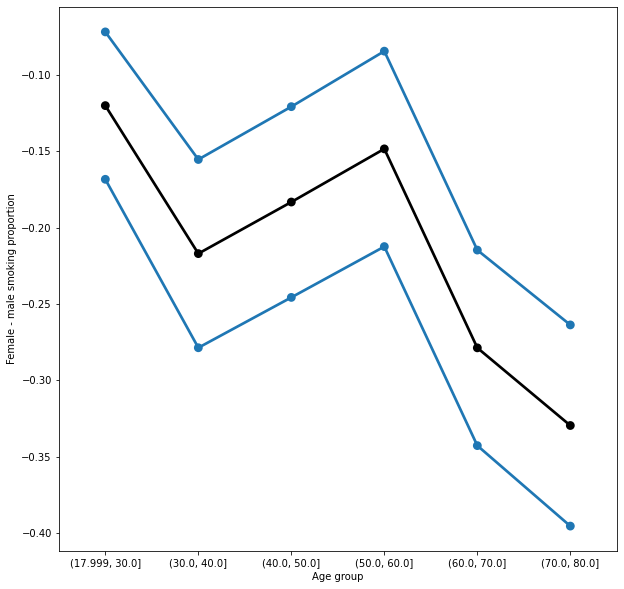

In [274]:
x = np.arange(df_poin_est['cb'].size)
a4_dims = (10,10)
fig, ax = plt.subplots(figsize=a4_dims)
pp = sns.pointplot(x, df_poin_est['cb'].values, color='black')
sns.pointplot(x,df_lcb_ucb['lcb'])
sns.pointplot(x, df_lcb_ucb['ucb'])
pp.set_xticklabels(df_poin_est['cb'].index)
pp.set_xlabel("Age group")
pp.set_ylabel("Female - male smoking proportion")

In [0]:
df1 = pd.read_csv('/content/cartwheel.csv')
df1['agegrp'] = pd.cut(df1['RIDAGEYR'], bins=[18, 30, 40, 50, 60, 70, 80])

In [280]:
df1.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,agegrp
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0,"(60, 70]"
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN,"(50, 60]"
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0,"(70, 80]"
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0,"(50, 60]"
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0,"(40, 50]"


In [0]:
df1['RIAGENDRx'] = df1['RIAGENDR'].replace({1:'Male', 2:'Female'})


In [283]:
df1 = df1[['RIAGENDRx','BMXBMI', 'agegrp']]
df1.head()

,RIAGENDRx,BMXBMI,agegrp
0,Male,27.8,"(60, 70]"
1,Male,30.8,"(50, 60]"
2,Male,28.8,"(70, 80]"
3,Female,42.4,"(50, 60]"
4,Female,20.3,"(40, 50]"


In [0]:
new_df1 = df1.groupby(['agegrp','RIAGENDRx']).aggregate(np.mean).unstack()
#result = new_df.groupby(['Genre'])['Danceability'].aggregate(np.mean).reset_index().sort_values('Danceability')


In [291]:

new_df1.columns=['Female', 'Male']
new_df1

,Female,Male
agegrp,,
"(18, 30]",28.123881,27.391822
"(30, 40]",30.325586,29.611726
"(40, 50]",31.160643,29.724623
"(50, 60]",30.743777,29.231486
"(60, 70]",31.074828,29.392488
"(70, 80]",29.138213,27.957692


In [294]:
new_df1_point_diff = pd.DataFrame(new_df1['Female']-new_df1['Male'])
new_df1_point_diff.columns=['Point_Estimate']
new_df1_point_diff

,Point_Estimate
agegrp,
"(18, 30]",0.732059
"(30, 40]",0.713861
"(40, 50]",1.436019
"(50, 60]",1.512291
"(60, 70]",1.682340
"(70, 80]",1.180521


In [0]:
new_df2 = df1.groupby(['agegrp','RIAGENDRx']).aggregate(np.std).unstack()

In [299]:
new_df2.columns=['Female', 'Male']
new_df2

,Female,Male
agegrp,,
"(18, 30]",7.745893,6.649440
"(30, 40]",8.315608,6.622412
"(40, 50]",8.076195,6.407076
"(50, 60]",7.575848,5.914373
"(60, 70]",7.604514,5.933307
"(70, 80]",6.284968,4.974855


In [0]:
new_df3= df1.groupby(["agegrp", "RIAGENDRx"]).agg({"BMXBMI": np.size}).unstack()

In [0]:
new_df3.columns=['Female','Male']

In [310]:
new_df2=np.square(new_df2)/new_df3
new_df2

,Female,Male
agegrp,,
"(18, 30]",0.098520,0.081278
"(30, 40]",0.145885,0.095756
"(40, 50]",0.129930,0.102371
"(50, 60]",0.122114,0.077048
"(60, 70]",0.131131,0.080559
"(70, 80]",0.096343,0.061565


In [0]:
new_df4 = pd.DataFrame(new_df2['Female']+new_df2['Male'])
new_df4.columns=['sum']

In [312]:
new_df4

,sum
agegrp,
"(18, 30]",0.179798
"(30, 40]",0.241641
"(40, 50]",0.232301
"(50, 60]",0.199162
"(60, 70]",0.211689
"(70, 80]",0.157909


In [0]:
m_o_e=1.96*np.sqrt(new_df4)

In [314]:
m_o_e

,sum
agegrp,
"(18, 30]",0.831091
"(30, 40]",0.963477
"(40, 50]",0.944673
"(50, 60]",0.874700
"(60, 70]",0.901790
"(70, 80]",0.778859


In [316]:
new_df1_point_diff.columns=['sum']
new_df1_point_diff

,sum
agegrp,
"(18, 30]",0.732059
"(30, 40]",0.713861
"(40, 50]",1.436019
"(50, 60]",1.512291
"(60, 70]",1.682340
"(70, 80]",1.180521


In [0]:
conint_lcb_bmi=new_df1_point_diff-m_o_e
conint_ucb_bmi=new_df1_point_diff+m_o_e

In [321]:
conint_lcb_bmi.columns=['lcb']
conint_lcb_bmi

,lcb
agegrp,
"(18, 30]",-0.099032
"(30, 40]",-0.249616
"(40, 50]",0.491347
"(50, 60]",0.637591
"(60, 70]",0.780550
"(70, 80]",0.401662


In [322]:
conint_ucb_bmi.columns=['ucb']
conint_ucb_bmi

,ucb
agegrp,
"(18, 30]",1.563150
"(30, 40]",1.677338
"(40, 50]",2.380692
"(50, 60]",2.386991
"(60, 70]",2.584130
"(70, 80]",1.959380


In [323]:
df_lcb_ucb_bmi=conint_lcb_bmi.merge(conint_ucb_bmi, on=['agegrp'])
df_lcb_ucb_bmi

,lcb,ucb
agegrp,,
"(18, 30]",-0.099032,1.563150
"(30, 40]",-0.249616,1.677338
"(40, 50]",0.491347,2.380692
"(50, 60]",0.637591,2.386991
"(60, 70]",0.780550,2.584130
"(70, 80]",0.401662,1.959380


Text(0, 0.5, 'Female - male smoking proportion')

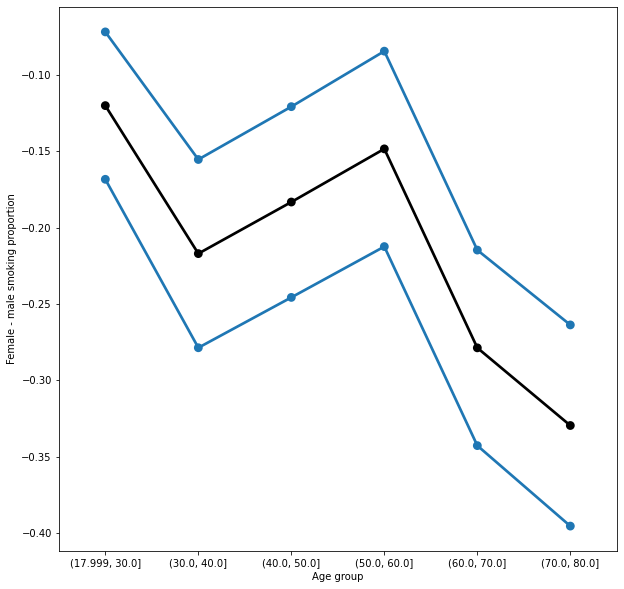

Text(0, 0.5, 'Female - male smoking proportion')

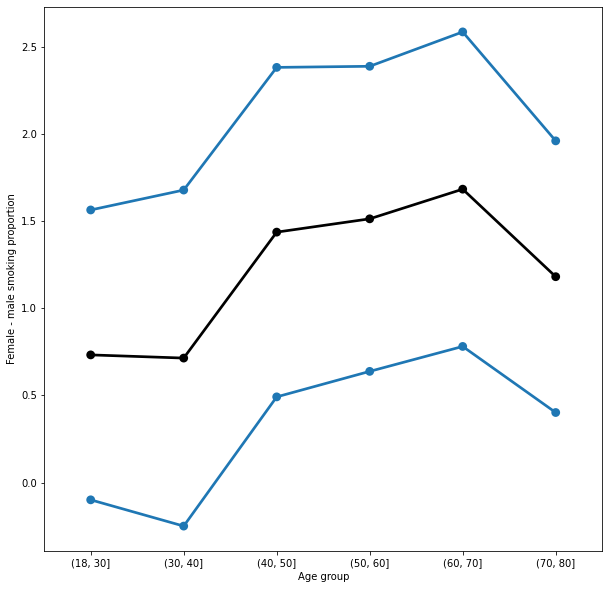

In [325]:
x = np.arange(new_df1_point_diff['sum'].size)
a4_dims = (10,10)
fig, ax = plt.subplots(figsize=a4_dims)
pp = sns.pointplot(x, new_df1_point_diff['sum'].values, color='black')
sns.pointplot(x,df_lcb_ucb_bmi['lcb'])
sns.pointplot(x, df_lcb_ucb_bmi['ucb'])
pp.set_xticklabels(new_df1_point_diff['sum'].index)
pp.set_xlabel("Age group")
pp.set_ylabel("Female - male smoking proportion")

In [0]:
da = pd.read_csv('/content/cartwheel.csv')
da['RIAGENDRx']=da['RIAGENDR'].replace(({1:'Male',2:'Female'}))

In [332]:
dx = da.loc[da.RIAGENDRx=="Female", ["RIAGENDRx", "BMXBMI"]].dropna()

all_cis = []
for n in 100, 200, 400, 800,1600:
    cis = []
    for i in range(500):
        dz = dx.sample(n)
        ci = sm.stats.DescrStatsW(dz.BMXBMI).zconfint_mean()
        cis.append(ci)
    cis = np.asarray(cis)
    mean_width = cis[:, 1].mean() - cis[:, 0].mean()
    print(n, mean_width)
    all_cis.append(cis)

100 3.0291147379434555
200 2.1512373426023466
400 1.515653264442328
800 1.0765312683559216
1600 0.7600266545773984


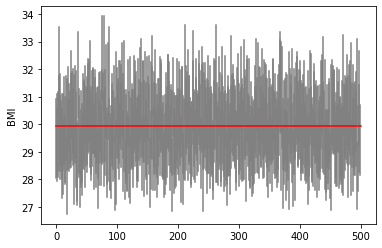

In [333]:
ci = all_cis[0]
for j, x in enumerate(ci):
    plt.plot([j, j], x, color='grey')
    plt.gca().set_ylabel("BMI")
mn = dx.BMXBMI.mean()
plt.plot([0, 500], [mn, mn], color='red')

In [334]:
print(np.mean(ci[:, 1] < mn)) # Upper limit falls below the target
print(np.mean(ci[:, 0] > mn)) # Lower limit falls above the target

0.034
0.024
